# CICERO SCM - model reading of input datafiles

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import warnings
try:
    from pandas.core.common import SettingWithCopyWarning
except:
    from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

/tmp/ipykernel_4070386/1364117225.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))

from ciceroscm import CICEROSCM

set up input directories

In [3]:
test_data_dir = "/user/home/lw13938/work/ciceroscm/tests/test-data/"

Run the model

In [5]:
# NBVAL_IGNORE_OUTPUT
scen = 'test'
cscm=CICEROSCM({
            "gaspam_file": os.path.join(test_data_dir, "gases_v1RCMIP.txt"),
            "emstart": 1850,   
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_file": os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"),
            "emissions_file": os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"),
            "nat_ch4_file": os.path.join(test_data_dir, "natemis_ch4.txt"),
            "nat_n2o_file": os.path.join(test_data_dir, "natemis_n2o.txt"),
            "idtm":24,
        })

11
12
113
114
115
22
141
123
142


/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_gas = pd.read_csv(filename, delim_whitespace=True, index_col=0)
/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:98: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_input = pd.read_csv(
/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:98: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_input = pd.read_csv(
/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:513: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_data = pd.read_csv(


In [6]:
# NBVAL_IGNORE_OUTPUT

cscm._run({
            "results_as_dict":True
        },
    pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12,
                   },
    pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qh2o_ch4":.171,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24},
    )

# Read model output into Pandas dataframes

What output do we have?

In [8]:
cscm.results.keys()

dict_keys(['OHC700', 'OHCTOT', 'RIB_glob', 'RIB_N', 'RIB_S', 'dT_glob', 'dT_NH', 'dT_SH', 'dT_glob_air', 'dT_NH_air', 'dT_SH_air', 'dT_glob_sea', 'dT_NH_sea', 'dT_SHsea', 'Total_forcing', 'Solar_forcing', 'Volcanic_forcing_NH', 'Volcanic_forcing_SH', 'emissions', 'concentrations', 'forcing'])

Convert the results into a dataframe

In [9]:
def to_df(cscm):
    out=pd.concat([pd.DataFrame(v) for k, v in cscm.results.items()], axis = 1, keys = list(cscm.results.keys()))
    return out

In [10]:

df_temp = to_df(cscm)


In [15]:
# NBVAL_IGNORE_OUTPUT
df_temp.keys().values

array([('OHC700', 0), ('OHCTOT', 0), ('RIB_glob', 0), ('RIB_N', 0),
       ('RIB_S', 0), ('dT_glob', 0), ('dT_NH', 0), ('dT_SH', 0),
       ('dT_glob_air', 0), ('dT_NH_air', 0), ('dT_SH_air', 0),
       ('dT_glob_sea', 0), ('dT_NH_sea', 0), ('dT_SHsea', 0),
       ('Total_forcing', 0), ('Solar_forcing', 0),
       ('Volcanic_forcing_NH', 0), ('Volcanic_forcing_SH', 0),
       ('emissions', 'Year'), ('emissions', 'CO2'), ('emissions', 'CH4'),
       ('emissions', 'N2O'), ('emissions', 'SO2'),
       ('emissions', 'CFC-11'), ('emissions', 'CFC-12'),
       ('emissions', 'CFC-113'), ('emissions', 'CFC-114'),
       ('emissions', 'CFC-115'), ('emissions', 'CH3Br'),
       ('emissions', 'CCl4'), ('emissions', 'CH3CCl3'),
       ('emissions', 'HCFC-22'), ('emissions', 'HCFC-141b'),
       ('emissions', 'HCFC-123'), ('emissions', 'HCFC-142b'),
       ('emissions', 'H-1211'), ('emissions', 'H-1301'),
       ('emissions', 'H-2402'), ('emissions', 'HFC125'),
       ('emissions', 'HFC134a'), ('em

Plot some example fields

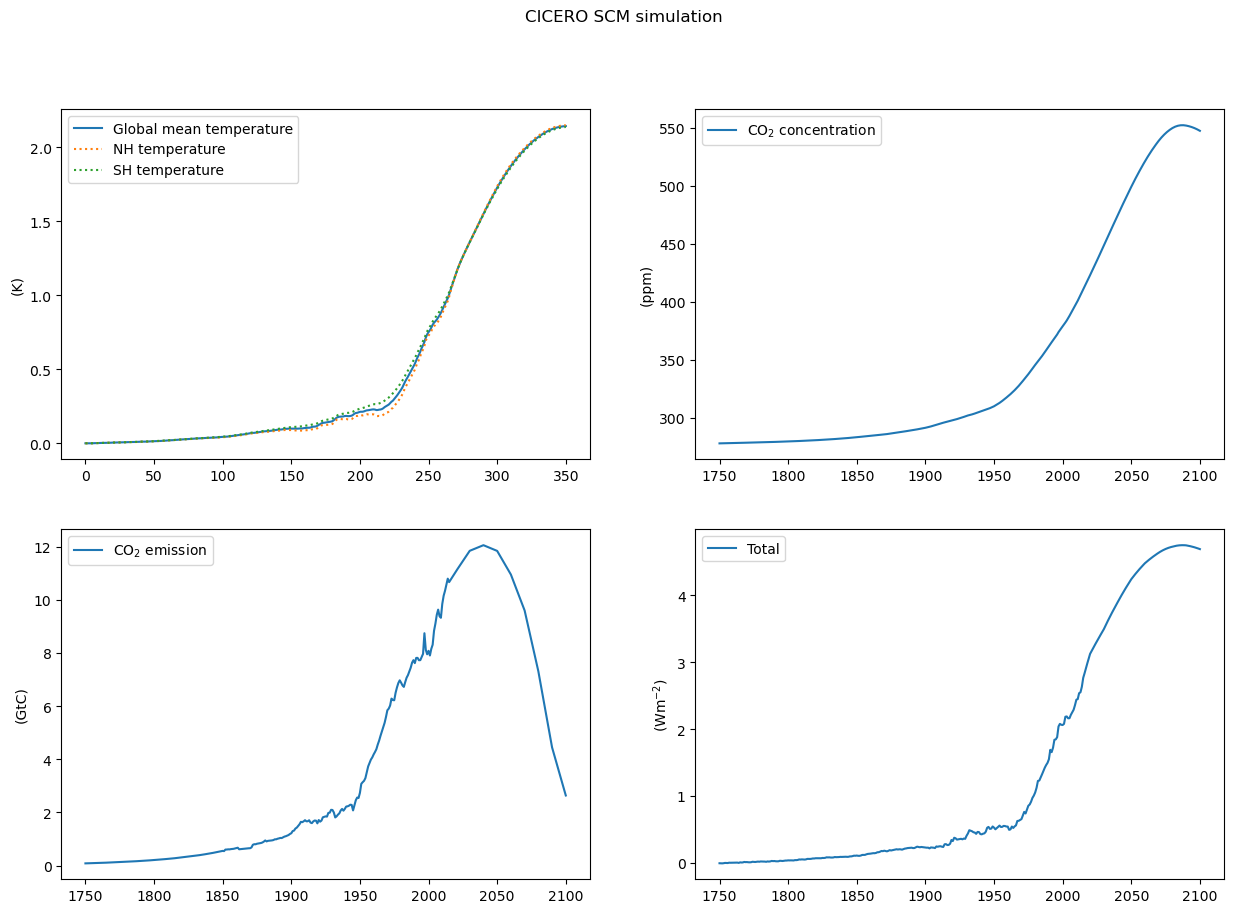

In [12]:
# NBVAL_IGNORE_OUTPUT
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['Global mean temperature','NH temperature','SH temperature'])

df_temp['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1])
axs[1].legend([r'CO$_2$ concentration'])

df_temp['emissions']['CO2'].plot(ylabel='(GtC)',ax=axs[2])
axs[2].legend([r'CO$_2$ emission'])

df_temp['forcing']['Total_forcing'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3])

axs[3].legend([r'Total','CO$_2$','CH$_4$','Land Use'])